In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd "drive/My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [3]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

print(device)

cuda


In [0]:
data = np.load("mnist_train_images.npy")
data.shape
data = torch.Tensor(data)/255

In [0]:
class Generator(torch.nn.Module):
  
  def __init__(self):
    super(Generator, self).__init__()
    
    self.fc1 = torch.nn.Linear(100, 128)
    self.lrelu1 = torch.nn.LeakyReLU(0.2)
    self.fc2 = torch.nn.Linear(128, 256)
    self.lrelu2 = torch.nn.LeakyReLU(0.2)
    # self.bn = torch.nn.BatchNorm1d(256, momentum=0.8)
    self.fc3 = torch.nn.Linear(256, 512)
    self.lrelu3 = torch.nn.LeakyReLU(0.2)
    self.fc4 = torch.nn.Linear(512, 784)
    self.tan = torch.nn.Tanh()

  def forward(self, x):

    out = self.fc1(x)
    out = self.lrelu1(out)
    out = self.fc2(out)
    out = self.lrelu2(out)
    # out = self.bn(out)
    out = self.fc3(out)
    out = self.lrelu3(out)
    out = self.fc4(out)
    out = self.tan(out)

    return out

In [0]:
class Discriminator(torch.nn.Module):

  def __init__(self):
    super(Discriminator, self).__init__()

    self.fc1 = torch.nn.Linear(784, 512)
    self.lrelu1 = torch.nn.LeakyReLU(0.2)
    self.drp1 = torch.nn.Dropout(0.2)
    self.fc2 = torch.nn.Linear(512, 256)
    self.lrelu2 = torch.nn.LeakyReLU(0.2)
    self.drp2 = torch.nn.Dropout(0.2)
    self.fc3 = torch.nn.Linear(256, 128)
    self.lrelu3 = torch.nn.LeakyReLU(0.2)
    self.drp3 = torch.nn.Dropout(0.2)
    self.fc4 = torch.nn.Linear(128, 1)
    self.sig = torch.nn.Sigmoid()

  def forward(self, x):
    
    out = self.fc1(x)
    out = self.lrelu1(out)
    out = self.drp1(out)
    out = self.fc2(out)
    out = self.lrelu2(out)
    out = self.drp2(out)
    out = self.fc3(out)
    out = self.lrelu3(out)
    out = self.drp3(out)
    out = self.fc4(out)
    out = self.sig(out)

    return out

In [0]:
def gen_train(gen, disc, real_labels, batch_size=1, z_size=100):

  z = torch.randn(batch_size, z_size).to(device)
  gen_out = gen(z)
  disc_out = disc(gen_out)

  gen_optim.zero_grad()
  error = torch.mean(torch.log(disc_out))
  (-error).backward()
  # loss = torch.nn.BCELoss()
  # error = loss(disc_out, real_labels)
  # error.backward()
  gen_optim.step()

  return error

In [0]:
def disc_train(gen, disc, real_data, real_labels, fake_labels, batch_size=1, z_size=100):
  
  z = torch.randn(batch_size, z_size).to(device)
  gen_out = gen(z)
  real_pred = disc(real_data)
  fake_pred = disc(gen_out)

  disc_optim.zero_grad()
  loss = torch.nn.BCELoss()
  error = loss(real_pred, real_labels) + loss(fake_pred, fake_labels)
  error.backward()
  # error = (torch.log(real_pred) + torch.log(1 - fake_pred)
  # (-error).backward()
  disc_optim.step()

  real_val = torch.mean(real_pred)
  fake_val = torch.mean(fake_pred)

  return error, real_val, fake_val

In [0]:
def train_gan(gen, disc, data, batch_size=1, z_size=100, k=1, epochs=10):

  real_labels = torch.ones(batch_size,1).to(device)
  fake_labels = torch.zeros(batch_size, 1).to(device)
  
  for epoch in range(epochs):
    print("Epoch: ", epoch+1)
    for i in range(0, len(data), batch_size):
      real_data = data[i:i+batch_size].to(device)

      for i in range(k):
        disc_loss, real_val, fake_val = disc_train(gen, disc, real_data, real_labels, fake_labels, batch_size, z_size)

      gen_loss = gen_train(gen, disc, real_labels, batch_size, z_size)

    print("Discriminator Loss: ", disc_loss.item())
    print("Real Mean: ", real_val.item())
    print("Fake Mean: ", fake_val.item())
    print("Generator Loss: ", gen_loss.item())

In [0]:
gen = Generator().to(device)
disc = Discriminator().to(device)
gen_optim = torch.optim.Adam(gen.parameters(), lr=0.0002)
disc_optim = torch.optim.Adam(disc.parameters(), lr=0.0005)

In [11]:
train_gan(gen, disc, data, batch_size=1000, k=1, epochs=2000)

Streaming output truncated to the last 5000 lines.
Discriminator Loss:  0.09669510275125504
Real Mean:  0.9781391024589539
Fake Mean:  0.031707484275102615
Generator Loss:  -5.5651726722717285
Epoch:  1002
Discriminator Loss:  0.12553714215755463
Real Mean:  0.9665080904960632
Fake Mean:  0.01799105480313301
Generator Loss:  -6.510441780090332
Epoch:  1003
Discriminator Loss:  0.09873725473880768
Real Mean:  0.9776548147201538
Fake Mean:  0.02925272285938263
Generator Loss:  -5.726434230804443
Epoch:  1004
Discriminator Loss:  0.09259343147277832
Real Mean:  0.9738509058952332
Fake Mean:  0.025627877563238144
Generator Loss:  -6.564548015594482
Epoch:  1005
Discriminator Loss:  0.07943664491176605
Real Mean:  0.9766558408737183
Fake Mean:  0.019416172057390213
Generator Loss:  -6.843968868255615
Epoch:  1006
Discriminator Loss:  0.09667947888374329
Real Mean:  0.9755640029907227
Fake Mean:  0.020612139254808426
Generator Loss:  -6.43340539932251
Epoch:  1007
Discriminator Loss:  0.1171

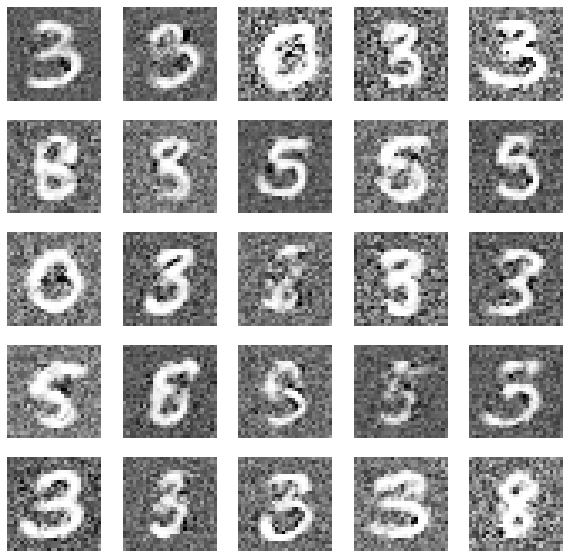

In [20]:
fig, ax = plt.subplots(figsize=(10,10), nrows=5, ncols=5)

plt.axis('off')
i=0
for row in ax:
  for col in row:
    dummy = torch.randn(1,100).to(device)
    image = gen(dummy[None,...])
    image = image.view(28,28)
    col.imshow(image.detach().cpu().numpy(), cmap='gray')
    col.set_axis_off()
    i+=1
    
plt.show()